In [1]:
# Import libraries
import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
import io
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")# for pretty graphs

In [2]:
#Upload training data
from google.colab import files
uploaded    = files.upload()
data        = pd.read_csv(io.BytesIO(uploaded['AirPassengers.csv']))

Saving AirPassengers.csv to AirPassengers.csv


In [3]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

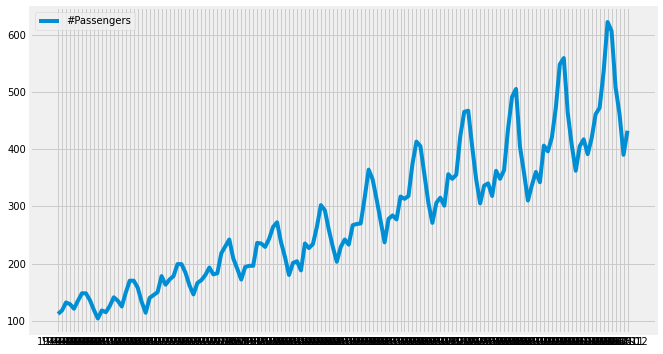

In [4]:
plt.figure(figsize=(10,6))
plt.plot(data.set_index('Month'))
plt.legend(['#Passengers'])

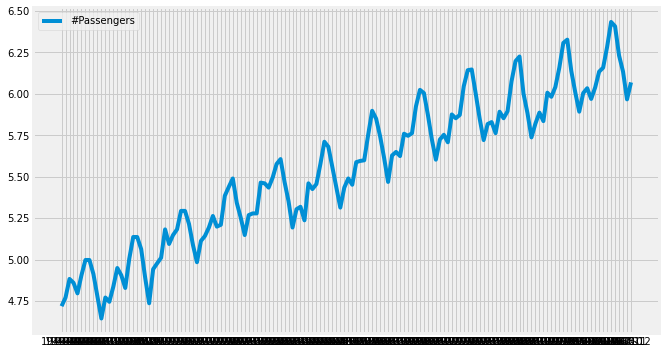

In [5]:
data['#Passengers'] = np.log(data['#Passengers'])
plt.figure(figsize=(10,6))
plt.plot(data.set_index('Month'))
plt.legend(['#Passengers'])

In [6]:
data.columns = ['ds','y']
data.head()

,ds,y
0,1949-01,4.718499
1,1949-02,4.770685
2,1949-03,4.882802
3,1949-04,4.859812
4,1949-05,4.795791


In [9]:
m1 = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)
m1.fit(data)

In [10]:
future1 = m1.make_future_dataframe(periods=60)
forecast1 = m1.predict(future1)
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,4.726389,4.676190,4.764391,4.726389,4.726389,-0.006817,-0.006817,-0.006817,0.081821,0.081821,0.081821,0.003041,0.003041,0.003041,-0.091678,-0.091678,-0.091678,0.0,0.0,0.0,4.719573
1,1949-02-01,4.730614,4.662721,4.749552,4.730614,4.730614,-0.024820,-0.024820,-0.024820,0.081821,0.081821,0.081821,-0.005141,-0.005141,-0.005141,-0.101500,-0.101500,-0.101500,0.0,0.0,0.0,4.705795
2,1949-03-01,4.734430,4.789487,4.875696,4.734430,4.734430,0.097828,0.097828,0.097828,0.081821,0.081821,0.081821,-0.005141,-0.005141,-0.005141,0.021148,0.021148,0.021148,0.0,0.0,0.0,4.832258
3,1949-04-01,4.738655,4.783718,4.874676,4.738655,4.738655,0.091719,0.091719,0.091719,0.081821,0.081821,0.081821,0.014537,0.014537,0.014537,-0.004639,-0.004639,-0.004639,0.0,0.0,0.0,4.830374
4,1949-05-01,4.742744,4.765363,4.859387,4.742744,4.742744,0.070173,0.070173,0.070173,0.081821,0.081821,0.081821,-0.001072,-0.001072,-0.001072,-0.010575,-0.010575,-0.010575,0.0,0.0,0.0,4.812917


In [11]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
199,1961-01-26,6.056607,6.015058,6.098944
200,1961-01-27,6.075002,6.033512,6.119165
201,1961-01-28,6.074204,6.029852,6.118642
202,1961-01-29,6.081466,6.038722,6.124025
203,1961-01-30,6.077514,6.032835,6.119597


In [12]:
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
199,426.924379,409.549640,445.387359
200,434.850528,417.177441,454.484960
201,434.503291,415.653685,454.247548
202,437.670306,419.356643,456.699249
203,435.943956,416.895175,454.681243


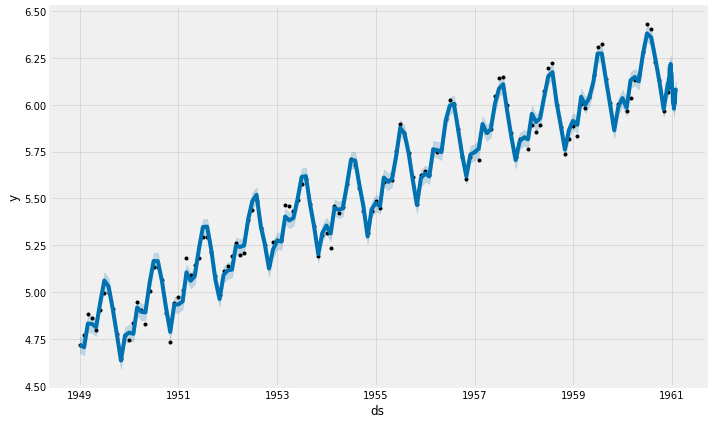

In [13]:
m1.plot(forecast1);

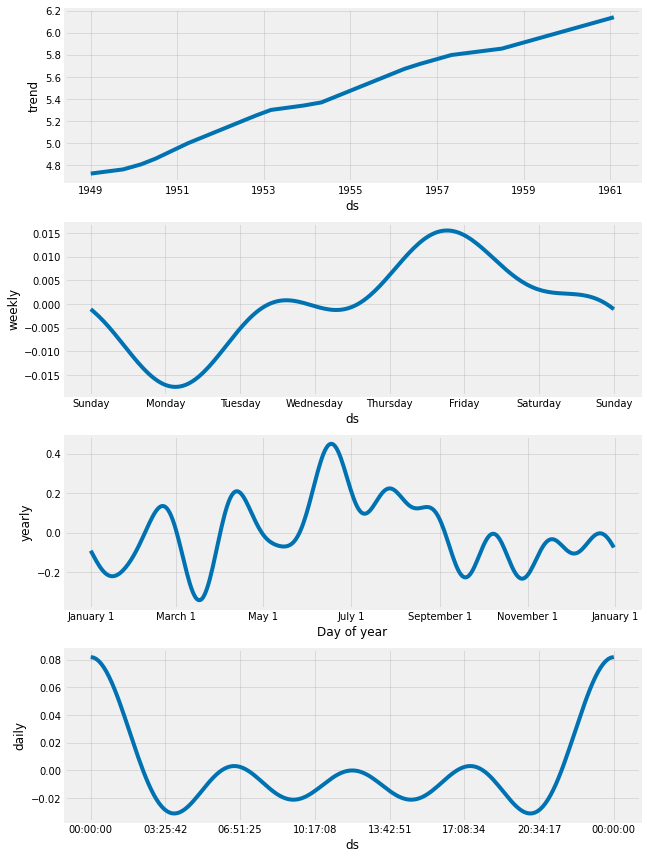

In [14]:
m1.plot_components(forecast1);

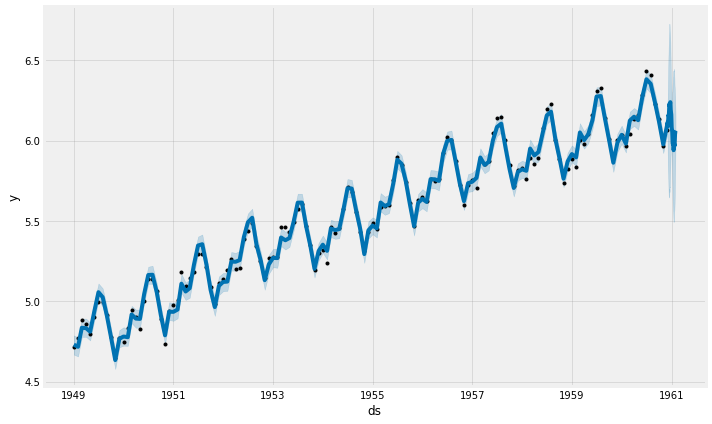

In [15]:
m3 = Prophet(mcmc_samples=300,weekly_seasonality=True,daily_seasonality=True,yearly_seasonality=True).fit(data)
future3 = m3.make_future_dataframe(periods=60)
forecast3 = m3.predict(future3)
forecast3["Views"] = np.exp(forecast3.yhat).round()
forecast3["Views_lower"] = np.exp(forecast3.yhat_lower).round()
forecast3["Views_upper"] = np.exp(forecast3.yhat_upper).round()
forecast3[(forecast3.ds > "3-22-2019") &
          (forecast3.ds < "4-07-2019")][["ds","Views_lower",
                                        "Views", "Views_upper"]]

m1.plot(forecast3);

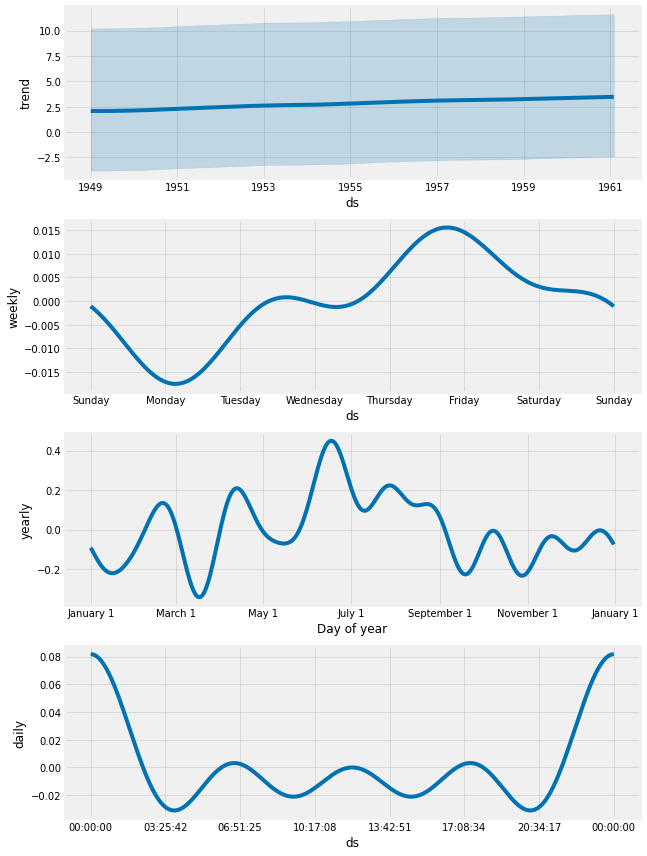

In [16]:
m1.plot_components(forecast3);